In [1]:
%matplotlib  inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq


In [3]:
data1= pd.read_parquet('formatparquet.parquet')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Stage           2236 non-null   category      
 1   Date            2236 non-null   datetime64[ns]
 2   Distance        2236 non-null   float64       
 3   Origin          2236 non-null   object        
 4   Destination     2236 non-null   object        
 5   Type            2236 non-null   category      
 6   Winner          2236 non-null   object        
 7   Winner_Country  2184 non-null   object        
 8   annee           2236 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 130.1+ KB


In [4]:
data1

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country,annee
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR,2017
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER,2017
2,3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK,2017
3,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA,2017
4,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA,2017
...,...,...,...,...,...,...,...,...,...
2231,2,1903-07-05,374.0,Lyon,Marseille,Stage with mountain(s),Hippolyte Aucouturier,FRA,1903
2232,3,1903-07-08,423.0,Marseille,Toulouse,Plain stage,Hippolyte Aucouturier,FRA,1903
2233,4,1903-07-12,268.0,Toulouse,Bordeaux,Plain stage,Charles Laeser,SUI,1903
2234,5,1903-07-13,425.0,Bordeaux,Nantes,Plain stage,Maurice Garin,FRA,1903


In [5]:
comp = data1.groupby('annee')
pd.set_option("display.max_rows", 50)  
len(comp)

104

In [6]:
comp.groups.keys()

dict_keys([1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [7]:
#comp.get_group(all).loc[:,'Distance'].mean()
print(comp['Distance'].count())
d = {'distance':comp['Distance'].mean() ,'etapes' :comp['Stage'].count()  }
print(d.keys())
synth= pd.DataFrame(d )
synth.head()

annee
1903     6
1904     6
1905    11
1906    13
1907    14
        ..
2013    21
2014    21
2015    21
2016    21
2017    21
Name: Distance, Length: 104, dtype: int64
dict_keys(['distance', 'etapes'])


,distance,etapes
annee,,
1903,404.666667,6
1904,404.833333,6
1905,274.636364,11
1906,349.461538,13
1907,320.571429,14


In [8]:
synth.reset_index(inplace =True)
synth.head()

,annee,distance,etapes
0,1903,404.666667,6
1,1904,404.833333,6
2,1905,274.636364,11
3,1906,349.461538,13
4,1907,320.571429,14


In [9]:
synth.head(30)
print(synth.info())
print(type(synth['etapes'].to_numpy()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   annee     104 non-null    int64  
 1   distance  104 non-null    float64
 2   etapes    104 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.6 KB
None
<class 'numpy.ndarray'>


<function matplotlib.pyplot.show(close=None, block=None)>

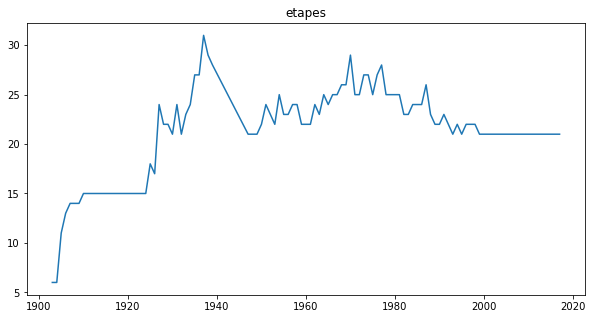

In [10]:
plt.figure(figsize=(10,5))
plt.title('etapes')

plt.plot(synth['annee'].to_numpy(),  synth['etapes'].to_numpy())  # warning sans numpy
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

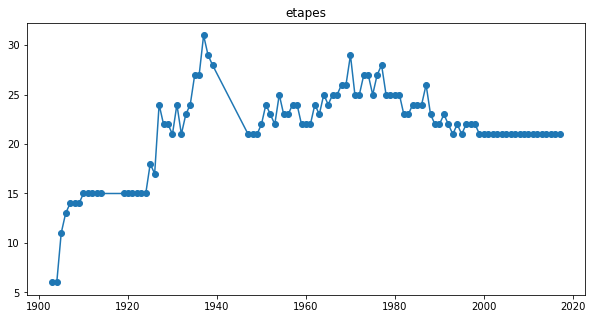

In [11]:
plt.figure(figsize=(10,5))
plt.title('etapes')
plt.plot(synth['annee'],  synth['etapes'], marker ='o')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

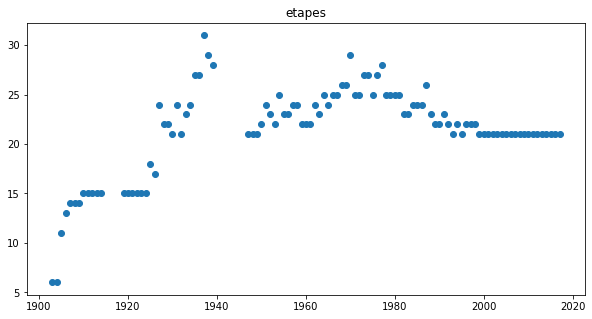

In [12]:
plt.figure(figsize=(10,5))
plt.title('etapes')
plt.plot(synth['annee'],  synth['etapes'], marker ='o', linestyle='')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

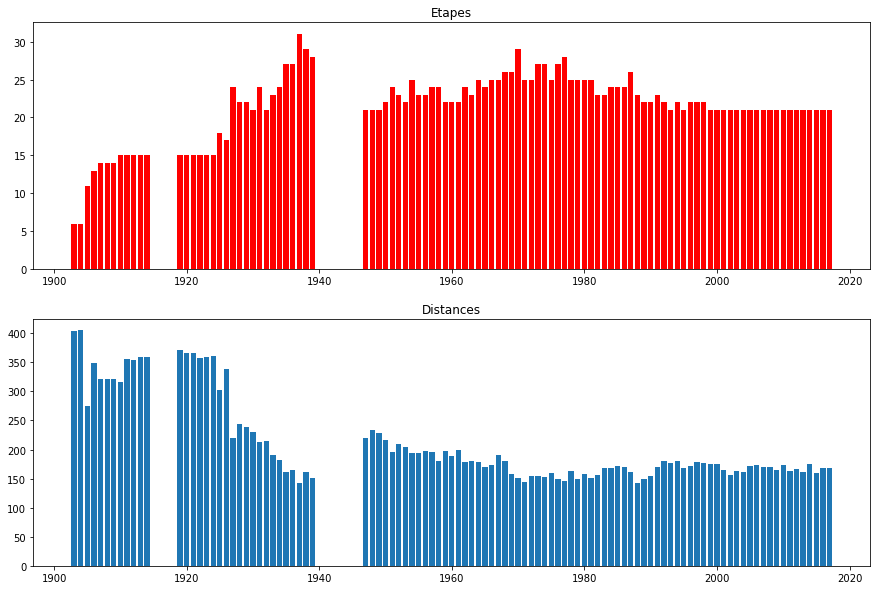

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.title('Etapes')
plt.bar(synth['annee'],  synth['etapes'], color ='r')
plt.subplot(2,1,2)
plt.title('Distances')

plt.bar(synth['annee'],  synth['distance'])

plt.show

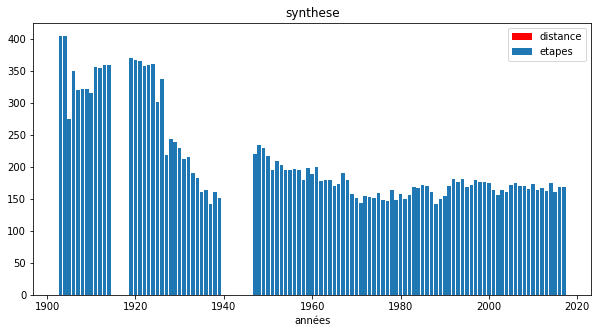

In [14]:

plt.figure(figsize=(10,5))
plt.title('synthese')


plt.bar(synth['annee'],  synth['etapes'], color ='r')
#plt.subplot(2,1,2)
plt.xlabel('années')

plt.bar(synth['annee'],  synth['distance']) 
plt.legend(['distance', 'etapes', ])
plt.show
plt.savefig('mongraph1.png')

<function matplotlib.pyplot.show(*args, **kw)>

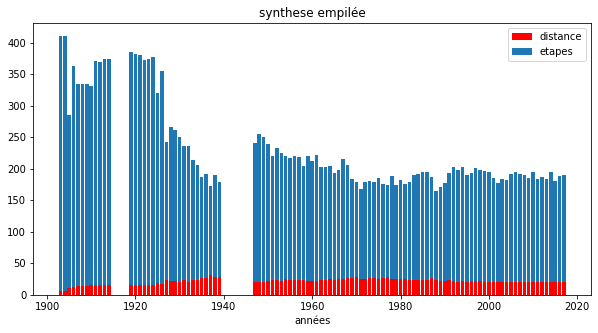

In [15]:
plt.figure(figsize=(10,5))
plt.title('synthese empilée')

plt.bar(synth['annee'],  synth['etapes'], color ='r')
#plt.subplot(2,1,2)
plt.xlabel('années')

plt.bar(synth['annee'],  synth['distance'], bottom =   synth['etapes']) 
plt.legend(['distance', 'etapes', ])
plt.show 

<function matplotlib.pyplot.show(*args, **kw)>

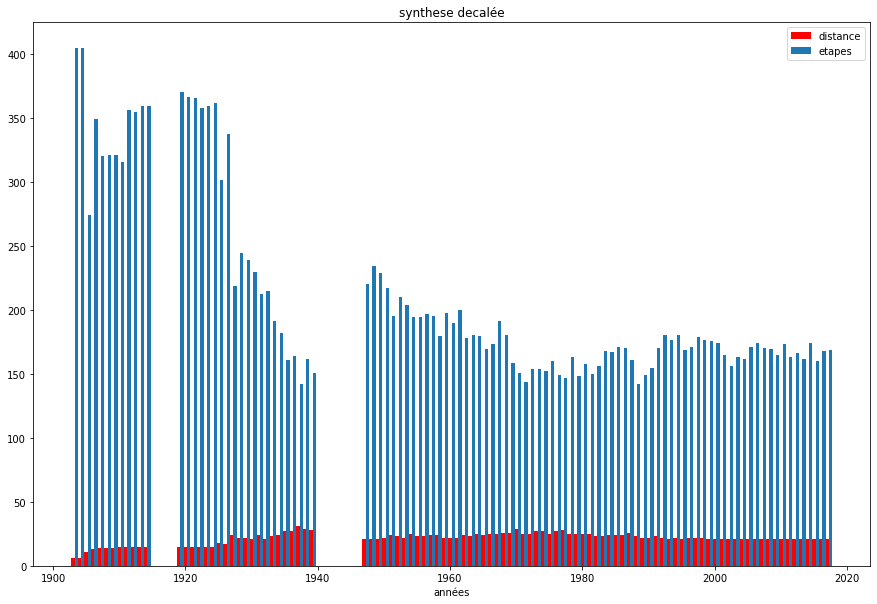

In [16]:
plt.figure(figsize=(15,10))
plt.title('synthese decalée')

plt.bar(synth['annee'],  synth['etapes'], color ='r', width= 0.5)
#plt.subplot(2,1,2)
plt.xlabel('années')

plt.bar(synth['annee']+ 0.5,  synth['distance'],  width= 0.5) 
plt.legend(['distance', 'etapes', ])
plt.show 

In [17]:
synth['color'] = 'b'
inf20 = synth['etapes'] < 20
inf20
synth.loc[inf20,'color'] = 'r'
synth.head(30)

,annee,distance,etapes,color
0,1903,404.666667,6,r
1,1904,404.833333,6,r
2,1905,274.636364,11,r
3,1906,349.461538,13,r
4,1907,320.571429,14,r
5,1908,321.214286,14,r
6,1909,321.214286,14,r
7,1910,315.600000,15,r
8,1911,356.266667,15,r
9,1912,354.600000,15,r


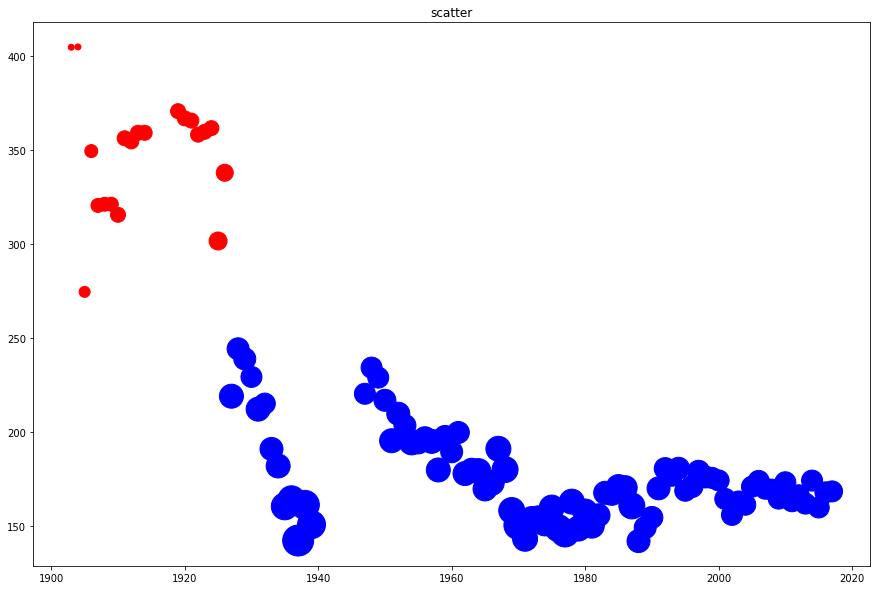

In [18]:
plt.figure(figsize=(15,10))
plt.title('scatter')

#def color_select(item):
#    if item 
                   
plt.scatter(synth['annee'],  synth['distance'], s = synth['etapes']**2 , c = synth['color'])
            